# <center> <u> Hyper Tuning & Feature selection in Regression using Correlation on Car price dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./CarPricesData.csv')

In [3]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [4]:
data.isnull().mean()*100

Price        0.000000
Age          0.139276
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.139276
Doors        0.000000
Weight       0.139276
dtype: float64

In [5]:
data.dropna(inplace=True)

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
le = LabelEncoder()

In [9]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])

In [10]:
data.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
821,8450,64.0,70116,2,110,1,0,1600.0,4,1035.0
1363,6900,69.0,58952,2,110,1,0,1600.0,3,1050.0
295,10950,38.0,41754,2,110,0,0,1600.0,3,1040.0
1009,8900,59.0,36954,2,110,1,0,1600.0,3,1050.0
528,10500,56.0,48731,2,110,1,0,1600.0,3,1055.0
1399,8950,74.0,48242,2,86,1,0,1300.0,5,1035.0
426,11450,49.0,86221,2,110,0,0,1600.0,3,1045.0
432,10950,54.0,81905,2,110,1,0,1600.0,5,1105.0
1318,8500,78.0,67255,2,110,0,0,1600.0,5,1085.0
166,19950,14.0,5459,2,110,1,0,1600.0,5,1130.0


### Selecting the features and targets

In [11]:
x = data.iloc[:, 1:].values
y = data.iloc[: ,0].values

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42,shuffle=True)

### Checking model scores without feature selection

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
model.score(x_test,y_test)

0.8708517690870113

In [17]:
model.score(x_train,y_train)

0.861762477331229

### Defining feature selection with all features included

In [18]:
fs = SelectKBest(score_func=f_regression, k='all')

### Fitting the fs

In [19]:
fs.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000002B2A2DAF160>)

### Checking the scores for the features

In [20]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' %(i, fs.scores_[i]))

Feature 0: 3723.096607
Feature 1: 589.688041
Feature 2: 0.007963
Feature 3: 137.680309
Feature 4: 10.973220
Feature 5: 0.873022
Feature 6: 23.886260
Feature 7: 40.573243
Feature 8: 506.819328


### Plotting the scores in a bar grapgh

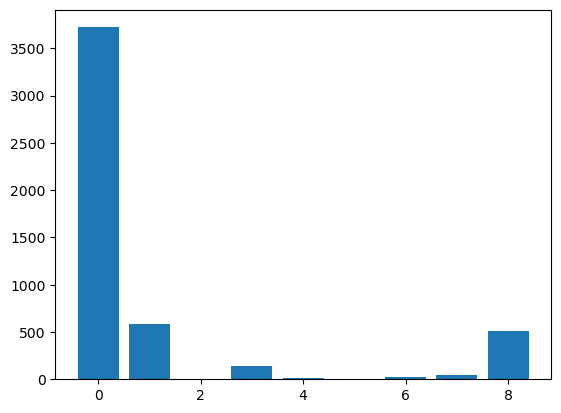

In [21]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### Selecting k = 4

In [22]:
fs = SelectKBest(score_func=f_regression, k=4)

#### Transorm the train and test data

In [23]:
fs.fit(x_train,y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x000002B2A2DAF160>)

In [24]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [25]:
x_test_fs.shape

(285, 4)

In [26]:
x_train_fs.shape

(1140, 4)

In [27]:
model =LinearRegression()

In [28]:
model.fit(x_train_fs,y_train)

LinearRegression()

In [29]:
y_pred_fs = model.predict(x_test_fs)

In [30]:
model.score(x_train_fs,y_train)

0.8581005278601517

In [31]:
model.score(x_test_fs,y_test)

0.8660327850546731

#### Selecting only the top feature

In [32]:
fs = SelectKBest(score_func=f_regression, k=1)

#### Fitting the fs

In [33]:
fs.fit(x_train,y_train)

SelectKBest(k=1, score_func=<function f_regression at 0x000002B2A2DAF160>)

#### Transforming the training and testing data

In [34]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [35]:
model.fit(x_train_fs,y_train)

LinearRegression()

In [36]:
model.score(x_train_fs,y_train)

0.7658964443630741

In [37]:
model.score(x_test_fs,y_test)

0.78439624199139

#### We can see that there is 76% of accuracy just by using only one variable

### Model Building in Feature selected variables

In [38]:
best_model = GradientBoostingRegressor().fit(x_train_fs,y_train)
y_pred = best_model.predict(x_test_fs)
Score = r2_score(y_test,y_pred_fs)
print("score before tuning hyper parameter tuning is : {}".format(Score))

score before tuning hyper parameter tuning is : 0.8660327850546731


In [39]:
GBR = GradientBoostingRegressor()

In [40]:
parameters = { 'learning_rate':[0.01,0.02,0.03,0.04],
                'n_estimators':[100,500,1000],
                'subsample':[0.9,0.5,0.2,0.1],
                'max_depth':[4,6,8]
}

In [41]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid=parameters, cv=2, n_jobs=-1,verbose=3)

In [42]:
grid_GBR.fit(x_train_fs,y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             verbose=3)

In [43]:
grid_GBR.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}

In [44]:
grid_GBR_tuned = GradientBoostingRegressor(learning_rate =0.03, max_depth= 4, n_estimators= 100, subsample= 0.5)

In [45]:
grid_GBR_tuned.fit(x_train_fs,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5)

In [46]:
y_pred_gbr = grid_GBR_tuned.predict(x_test_fs)

In [47]:
score = r2_score(y_test,y_pred_gbr)
mae = mean_absolute_error(y_test,y_pred_gbr)
mse = mean_squared_error(y_test,y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbr))

In [48]:
print("r2 score: ",score)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)

r2 score:  0.8606785182906352
mae:  1002.9492302956411
mse:  1725237.9585063462
rmse:  1313.4831397876208


### Model building without feature selection

In [49]:
best_model = GradientBoostingRegressor().fit(x_train,y_train)
y_pred = best_model.predict(x_test)
Score = r2_score(y_test,y_pred)
print("score before tuning hyper parameter tuning is : {}".format(Score))

score before tuning hyper parameter tuning is : 0.918413493955746


In [50]:
GBR = GradientBoostingRegressor()

In [51]:
parameters = { 'learning_rate':[0.01,0.02,0.03,0.04],
                'n_estimators':[100,500,1000],
                'subsample':[0.9,0.5,0.2,0.1],
                'max_depth':[4,6,8]
}

In [52]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid=parameters, cv=2, n_jobs=-1,verbose=3)

In [53]:
grid_GBR.fit(x_train,y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             verbose=3)

In [54]:
grid_GBR.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

In [55]:
grid_GBR_tuned = GradientBoostingRegressor(learning_rate =0.01, max_depth= 4, n_estimators= 500, subsample= 0.5)

In [56]:
grid_GBR_tuned.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.5)

In [57]:
y_pred_gbr = grid_GBR_tuned.predict(x_test)

In [58]:
score = r2_score(y_test,y_pred_gbr)
mae = mean_absolute_error(y_test,y_pred_gbr)
mse = mean_squared_error(y_test,y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbr))

In [59]:
print("r2 score: ",score)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)

r2 score:  0.9218239217516794
mae:  792.5134453332428
mse:  968065.6276863251
rmse:  983.9032613455071


In [60]:
predict = grid_GBR_tuned.predict(x)

In [61]:
price = data.Price.values

In [62]:
PREDICT = pd.DataFrame(zip(price,predict), columns=("ACTUAL","PREDICTED"))

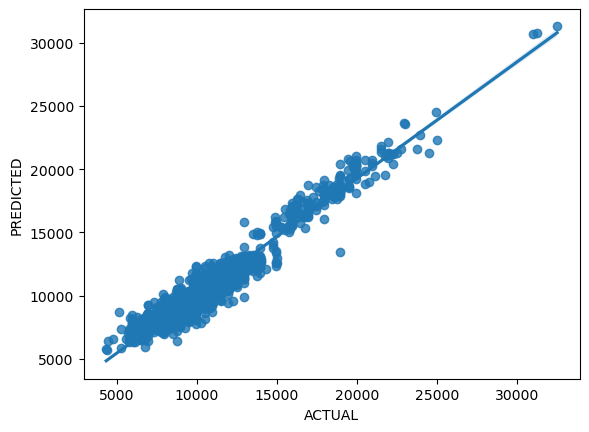

In [63]:
sns.regplot(data=PREDICT, x="ACTUAL", y="PREDICTED");